In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/ChanchalKumarMaji/AI-for-Medicine-Specialization-deeplearning.ai/master/AI%20for%20Medical%20Prognosis/Week%201/utils.py

--2020-06-14 22:45:33--  https://raw.githubusercontent.com/ChanchalKumarMaji/AI-for-Medicine-Specialization-deeplearning.ai/master/AI%20for%20Medical%20Prognosis/Week%201/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214 (1.2K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   1.19K  --.-KB/s    in 0s      

2020-06-14 22:45:33 (97.1 MB/s) - ‘utils.py’ saved [1214/1214]



In [0]:
from utils import load_data

X, y = load_data(6000)

In [6]:
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,79.606869,78.027827,87.853178
1,63.529850,110.766670,88.289254,95.179780
2,69.003986,99.472460,105.407777,117.624365
3,82.638210,89.290826,77.863073,94.835185
4,78.346286,95.732701,86.459722,110.671407


In [7]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.75)

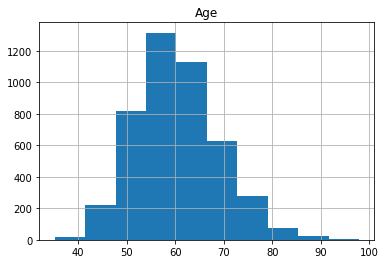

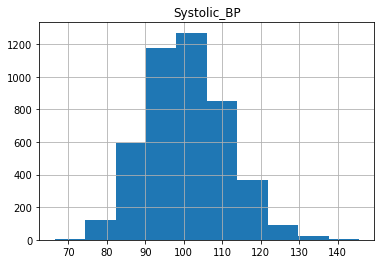

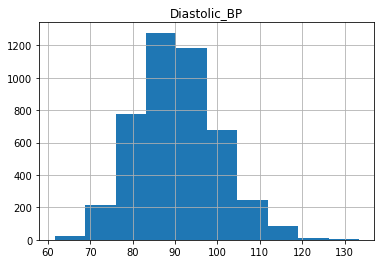

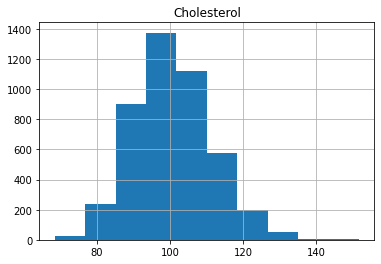

In [10]:
for col in X.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

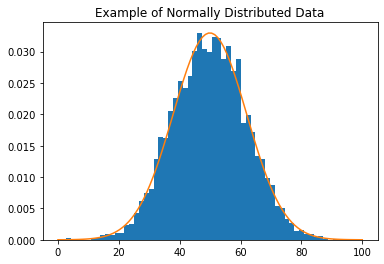

In [11]:
from scipy.stats import norm

data = np.random.normal(50, 12, 5000)
fitting_params = norm.fit(data)

norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0, 100, 100)

plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

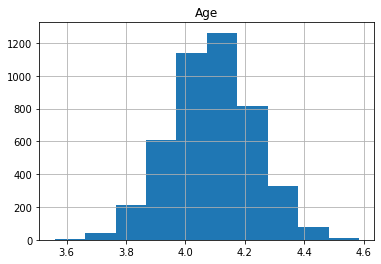

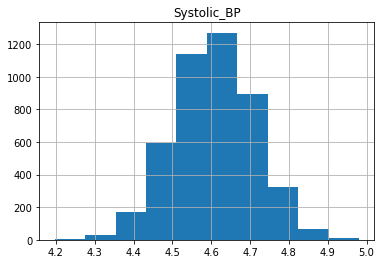

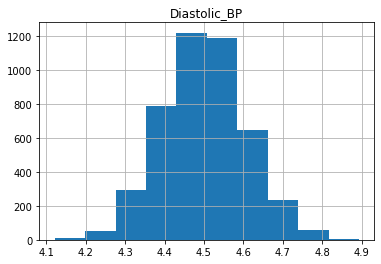

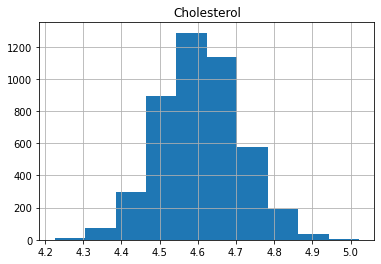

In [12]:
for col in X_train_raw.columns:
    np.log(X_train_raw.loc[:, col]).hist()
    plt.title(col)
    plt.show()

In [0]:
def make_standard_normal(df_train, df_test):
    # Remove skew by applying the log function to the train set, and to the test set
    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)

    # calculate the mean and standard deviation of the training set
    mean = df_train_unskewed.mean(axis=0)
    stdev = df_train_unskewed.std(axis=0)

    # standardize the training set
    df_train_standardized = (df_train_unskewed - mean) / stdev

    # standardize the test set
    df_test_standardized = (df_test_unskewed - mean) / stdev

    return df_train_standardized, df_test_standardized

In [14]:
# test 
tmp_train = pd.DataFrame({'field1': [1,2,10], 'field2': [4,5,11]})
tmp_test = pd.DataFrame({'field1': [1,3,10], 'field2': [4,6,11]})
tmp_train_transformed, tmp_test_transformed = make_standard_normal(tmp_train, tmp_test)

print(f"Training set transformed field1 has mean {tmp_train_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_train_transformed['field1'].std(axis=0):.4f} ")
print(f"Test set transformed, field1 has mean {tmp_test_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_test_transformed['field1'].std(axis=0):.4f}")
print(f"Skew of training set field1 before transformation: {tmp_train['field1'].skew(axis=0):.4f}")
print(f"Skew of training set field1 after transformation: {tmp_train_transformed['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 before transformation: {tmp_test['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 after transformation: {tmp_test_transformed['field1'].skew(axis=0):.4f}")

Training set transformed field1 has mean -0.0000 and standard deviation 1.0000 
Test set transformed, field1 has mean 0.1144 and standard deviation 0.9749
Skew of training set field1 before transformation: 1.6523
Skew of training set field1 after transformation: 1.0857
Skew of test set field1 before transformation: 1.3896
Skew of test set field1 after transformation: 0.1371


In [0]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

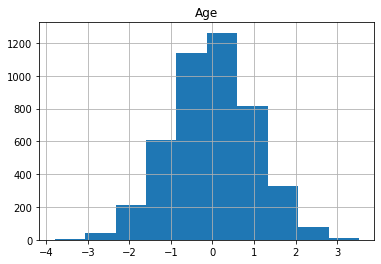

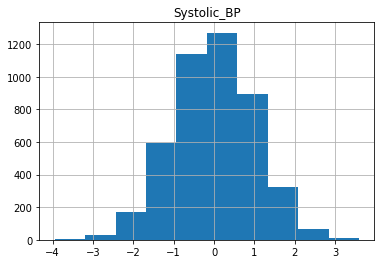

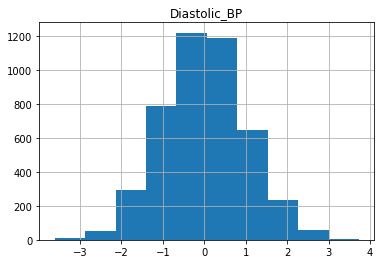

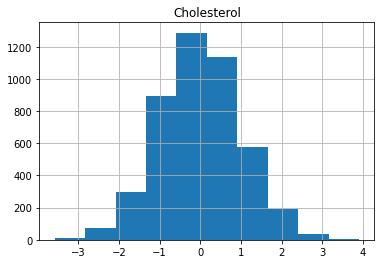

In [17]:
for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

In [0]:
def lr_model(X_train, y_train):

    # import the LogisticRegression class
    from sklearn.linear_model import LogisticRegression

    # create the model object
    model = LogisticRegression()

    # fit the model to the training data
    model.fit(X_train, y_train)

    # return the fitted model
    return model

In [19]:
# Test
tmp_model = lr_model(X_train[0:3], y_train[0:3])

print(tmp_model.predict(X_train[4:5]))
print(tmp_model.predict(X_train[5:6]))

[1.]
[0.]


In [22]:
model_X = lr_model(X_train, y_train)
model_X

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def cindex(y_true, scores):

    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0

    # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n):

            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible += 1

                # For permissible pairs, check if they are concordant or are ties

                # check for ties in the scores
                if scores[i] == scores[j]:
                    # count the tie
                    ties += 1
                    # if it's a tie, we don't need to check patient outcomes, continue to the top of the for loop
                    continue
                
                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower score than patient j
                    if scores[i] < scores[j]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair
                    # We already checked for ties earlier

                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair
                    # We already checked for ties earlier
    
    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs
    c_index = (concordant + 0.5* ties) / permissible

    return c_index

In [26]:
# test 
y_true = np.array([1.0, 0.0, 0.0, 1.0])

# Case 1
scores = np.array([0, 1, 1, 0])
print('Case 1 Output: {}'.format(cindex(y_true, scores)))

# Case 2
scores = np.array([1, 0, 0, 1])
print('Case 2 Output: {}'.format(cindex(y_true, scores)))

# Case 3
scores = np.array([0.5, 0.5, 0.0, 1.0])
print('Case 3 Output: {}'.format(cindex(y_true, scores)))

cindex(y_true, scores)

Case 1 Output: 0.0
Case 2 Output: 1.0
Case 3 Output: 0.875


0.875

In [27]:
scores = model_X.predict_proba(X_test)[:, 1]
c_index_X_test = cindex(y_test.values, scores)

print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.8146


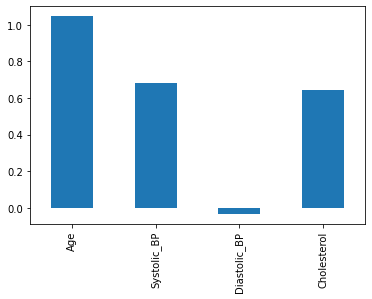

In [29]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None)

In [0]:
def add_interactions(X):
    
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)

    # 'i' loops through all features in the original dataframe X
    for i in range(m):

        # get the name of feature 'i'
        feature_i_name = features[i]

        # get the data for feature 'i'
        feature_i_data = X[feature_i_name]

        # choose the index of column 'j' to be greater than columns i
        for j in range(i+1, m):

            # get the name of feature 'j'
            feature_j_name = features[j]

            # get the data for feature 'j'
            feature_j_data = X[feature_j_name]

            # create the name of the interaction feature by combining both names
            # example: "apple" and "orange" are combined to be "apple_x_orange"
            feature_i_j_name = f"{feature_i_name}_x_{feature_j_name}"

            # Multiply the data for feature 'i' and feature 'j'
            # store the result as a column in dataframe X_int
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
    
    return X_int

In [31]:
print("Original Data")
print(X_train.loc[:, ['Age', 'Systolic_BP']].head())

print("Data w/ Interactions")
print(add_interactions(X_train.loc[:, ['Age', 'Systolic_BP']].head()))

Original Data
           Age  Systolic_BP
2472 -2.340711     0.040890
4496  0.009916    -1.150687
2243  0.927302     0.190153
4311 -0.087282     0.814256
843   2.204586    -0.058141
Data w/ Interactions
           Age  Systolic_BP  Age_x_Systolic_BP
2472 -2.340711     0.040890          -0.095712
4496  0.009916    -1.150687          -0.011410
2243  0.927302     0.190153           0.176329
4311 -0.087282     0.814256          -0.071070
843   2.204586    -0.058141          -0.128177


In [0]:
X_train_int = add_interactions(X_train)
X_test_int = add_interactions(X_test)

In [0]:
model_X_int = lr_model(X_train_int, y_train)

In [34]:
scores_X = model_X.predict_proba(X_test)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X)

scores_X_int = model_X_int.predict_proba(X_test_int)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X_int)

print(f"c-index on test set without interactions is {c_index_X_test:.4f}")
print(f"c-index on test set with interactions is {c_index_X_int_test:.4f}")

c-index on test set without interactions is 0.8146
c-index on test set with interactions is 0.8303


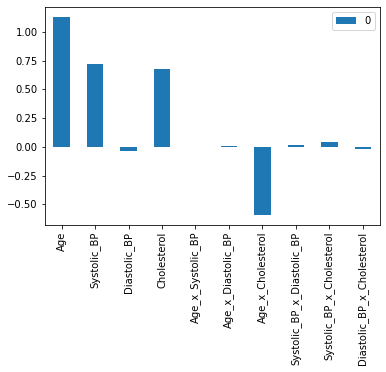

In [35]:
int_coeffs = pd.DataFrame(data = model_X_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar();

In [36]:
index = 350
case = X_train_int.iloc[index, :]
print(case)

Age                           0.556615
Systolic_BP                  -1.059570
Diastolic_BP                 -0.877230
Cholesterol                   0.487496
Age_x_Systolic_BP            -0.589772
Age_x_Diastolic_BP           -0.488279
Age_x_Cholesterol             0.271347
Systolic_BP_x_Diastolic_BP    0.929487
Systolic_BP_x_Cholesterol    -0.516536
Diastolic_BP_x_Cholesterol   -0.427646
Name: 781, dtype: float64


In [37]:
new_case = case.copy(deep=True)
new_case.loc["Age_x_Cholesterol"] = 0
new_case

Age                           0.556615
Systolic_BP                  -1.059570
Diastolic_BP                 -0.877230
Cholesterol                   0.487496
Age_x_Systolic_BP            -0.589772
Age_x_Diastolic_BP           -0.488279
Age_x_Cholesterol             0.000000
Systolic_BP_x_Diastolic_BP    0.929487
Systolic_BP_x_Cholesterol    -0.516536
Diastolic_BP_x_Cholesterol   -0.427646
Name: 781, dtype: float64

In [38]:
print("Output with interaction: {}".format(model_X_int.predict_proba([case.values])[:, 1]))
print("Output without interaction: {}".format(model_X_int.predict_proba([new_case.values])[:, 1]))

Output with interaction: [0.50741471]
Output without interaction: [0.54730115]
